In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import trapezoid, simpson, romberg, quad

# Laboratorio 06: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Edgar Junior Córdoba Gamboa
*Métodos computacionales 2024-II*

---

#1

Usando los métodos trapezoidal, Simpson y cuadratura encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [ ]:

def f1(x):
    return 1 / np.sqrt(np.tan(x))

def f2(x):
    return np.cos(x) / x**3

def f3(y, x):
    return 1 / np.sqrt(1 - y**2)

epsilon = 1e-5
#Integral 1
x_vals1 = np.geomspace(1e-4, np.pi/2, 5001)  # Distribución logarítmica para mejorar precisión cerca de 0
if len(x_vals1) % 2 == 0:
    x_vals1 = np.geomspace(1e-4, np.pi/2, 5002)
y_vals1 = f1(x_vals1)
trap1 = trapezoid(y=y_vals1, x=x_vals1)
simp1 = simpson(y=y_vals1, x=x_vals1)
quad1, err1 = quad(f1, 1e-4, np.pi/2, epsabs=epsilon)  # Evitar singularidad en x=0

assert abs(simp1 - quad1) <= 10 * epsilon
assert err1 <= epsilon

#Integral 2
x_vals2 = np.linspace(1, 50, 5001)
if len(x_vals2) % 2 == 0:
    x_vals2 = np.linspace(1, 50, 5002)
y_vals2 = f2(x_vals2)
trap2 = trapezoid(y=y_vals2, x=x_vals2)
simp2 = simpson(y=y_vals2, x=x_vals2)
quad2, err2 = quad(f2, 1, np.inf, epsabs=epsilon)

assert abs(simp2 - quad2) <= epsilon
assert err2 <= epsilon

#Integral 3
quad3, err3 = dblquad(f3, 0, np.pi/4, lambda x: 0, lambda x: np.sin(x), epsabs=epsilon)
assert err3 <= epsilon, "Error en Cuadratura Gaussiana (Integral 3) excede el umbral"

In [ ]:
print("Integral 1 Método Trapezoidal :", trap1, "Error:", abs(trap1 - quad1))
print("Integral 1 Método Simpson:", simp1, "Error:", abs(simp1 - quad1))
print("Integral 1 Cuadratura Gaussiana:", quad1, "Error:", err1)

Integral 1 Método Trapezoidal : 2.2014080919354106 Error: 3.3379474013717214e-05
Integral 1 Método Simpson: 2.2014278868269326 Error: 1.3584582491787955e-05
Integral 1 Cuadratura Gaussiana: 2.2014414714094244 Error: 7.246540121745385e-06


In [ ]:
print("Integral 2 Método Trapezoidal:", trap2, "Error:", abs(trap2 - quad2))
print("Integral 2 Método Simpson:", simp2, "Error:", abs(simp2 - quad2))
print("Integral 2 Cuadratura Gaussiana:", quad2, "Error:", err2)

Integral 2 Método Trapezoidal: 0.018134779913939244 Error: 1.7367565783622113e-05
Integral 2 Método Simpson: 0.01811507631967207 Error: 2.3360284835509393e-06
Integral 2 Cuadratura Gaussiana: 0.018117412348155622 Error: 7.237636778095746e-06


In [ ]:
print("Integral 3 Cuadratura Gaussiana:", quad3, "Error:", err3)

Integral 3 Cuadratura Gaussiana: 0.30842513753404244 Error: 6.66175985287692e-14


#2

El trabajo realizado sobre un objeto es igual a la fuerza por la distancia recorrida en la dirección de la fuerza. Se la velocidad de un objeto en la dirección $x$

\begin{eqnarray}
v_x = 4t && 0\leq t\leq 5\\
v_x = 20 + (5-t)^2  && 5\leq t\leq 15
\end{eqnarray}

donde $v_x$ está en m/s.

* Realice un gráfico de la distancia $x$ que recorre el objeto en función del tiempo.

* Calcule el valor del trabajo para una fuerza constante $F_x$ de 200 N para todo $t$.



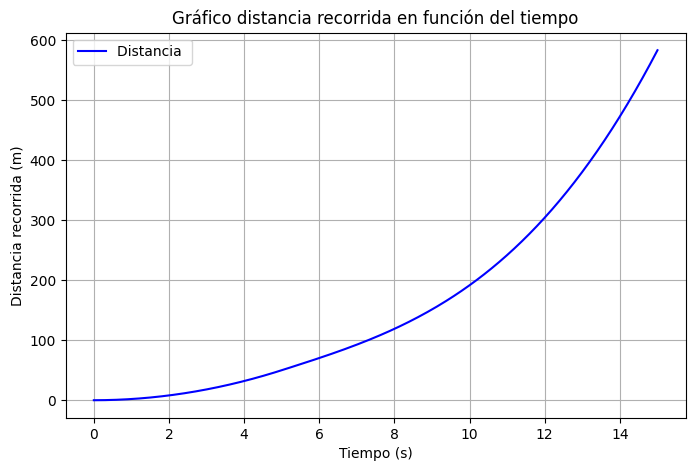

Distancia total recorrida: 583.33 m
Trabajo realizado: 116666.67 J


In [ ]:
def v_x(t):
    return np.piecewise(t, [t < 5, (t >= 5) & (t <= 15)], [lambda t: 4*t, lambda t: 20 + (5 - t)**2])
# Integramos para obtener la posición x(t)
def x_t(t):
    if t <= 5:
        return quad(lambda tau: 4*tau, 0, t)[0]
    else:
        x1 = quad(lambda tau: 4*tau, 0, 5)[0]
        x2 = quad(lambda tau: 20 + (5 - tau)**2, 5, t)[0]
        return x1 + x2

# Vector de tiempo para la gráfica
t_vals = np.linspace(0, 15, 300)
x_vals = np.array([x_t(t) for t in t_vals])

plt.figure(figsize=(8,5))
plt.plot(t_vals, x_vals, label="Distancia ", color='b')
plt.xlabel("Tiempo (s)")
plt.ylabel("Distancia recorrida (m)")
plt.title("Gráfico distancia recorrida en función del tiempo")
plt.legend()
plt.grid()
plt.show()

# Cálculo del trabajo realizado
d_total = x_t(15)
F_x = 200
W = F_x * d_total

print(f"Distancia total recorrida: {d_total:.2f} m")
print(f"Trabajo realizado: {W:.2f} J")

#3
La cantidad de masa transportada por una tuberia durante un periodo se puede calcular como

$$M = \int_{t_1}^{t_2} Q(t) c(t) \; dt$$

siendo M (masa en mg), $Q(t)$ el caudal y $c(t)$ concentración (mg/m$^3$). Sean las siguientes representaciones funcionales:

$$Q(t) = 9 + 5 \cos^2 (0.4t)$$
$$c(t) = 5e^{-0.5 t} + 2 e^{0.15 t}$$

Determine la masa transportada entre $t_1 = 2$ y $t_2 = 8 \mbox{ min}$ usando:

* Haga un gráfico del flujo y la concentración en función del tiempo.
* Determine el valor de la integral usando el método de integración de Romberg
* Compruebe sus resultado usando el método de cuadratura Gaussiana adaptativa `quad`.


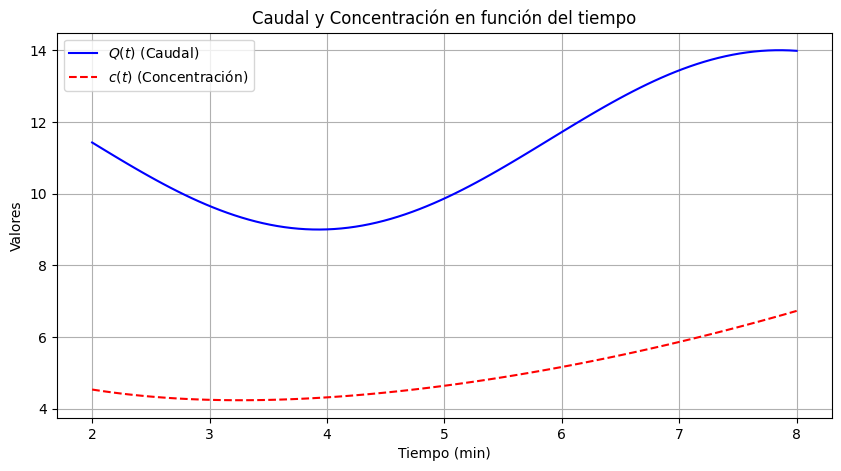

Masa transportada con Romberg: 335.962530 mg
Masa transportada con quad: 335.962530 mg
Error estimado con quad: 3.73e-12


<ipython-input-28-7e470ff173e9>:27: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  M_romberg = romberg(Qc, t1, t2)


In [ ]:
# Definimos las funciones de caudal y concentración
Q = lambda t: 9 + 5 * np.cos(0.4 * t)**2
c = lambda t: 5 * np.exp(-0.5 * t) + 2 * np.exp(0.15 * t)

# Producto de las funciones para la integral
Qc = lambda t: Q(t) * c(t)

# Intervalo de integración
t1, t2 = 2, 8

# Graficar Q(t) y c(t)
t_vals = np.linspace(t1, t2, 100)
Q_vals = Q(t_vals)
c_vals = c(t_vals)

plt.figure(figsize=(10, 5))
plt.plot(t_vals, Q_vals, label=r'$Q(t)$ (Caudal)', color='b')
plt.plot(t_vals, c_vals, label=r'$c(t)$ (Concentración)', color='r', linestyle='dashed')
plt.xlabel('Tiempo (min)')
plt.ylabel('Valores')
plt.title('Caudal y Concentración en función del tiempo')
plt.legend()
plt.grid()
plt.show()

# Cálculo de la integral usando Romberg
M_romberg = romberg(Qc, t1, t2)

# Cálculo de la integral usando cuadratura Gaussiana adaptativa
M_quad, error_quad = quad(Qc, t1, t2)

# Mostrar resultados
print(f"Masa transportada con Romberg: {M_romberg:.6f} mg")
print(f"Masa transportada con quad: {M_quad:.6f} mg")
print(f"Error estimado con quad: {error_quad:.2e}")

#4
Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequeñas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

In [ ]:
def calcular_periodo(I0, m, g, b, theta0):
    P0 = 2 * np.pi * np.sqrt(I0 / (m * g * b))
    k = np.sin(theta0 / 2)
    def integrando(phi):
        return 1 / np.sqrt(1 - k**2 * np.sin(phi)**2)

    # Integración numérica usando el método de cuadratura
    integral_num, _ = quad(integrando, 0, np.pi / 2)

    # Cálculo del periodo
    P_numerico = (2 * P0 / np.pi) * integral_num

    return P_numerico

# Parámetros del péndulo
I0 = 0.1
m = 1.0
g = 9.81
b = 0.5
theta0 = np.radians(45)

# Cálculo del periodo
P_num = calcular_periodo(I0, m, g, b, theta0)

# Resultados
print(f"Periodo numérico: {P_num:.6f} s")


Periodo numérico: 0.933002 s


#5
El departamento de transporte encuentra que la tasa a la cual los autos cruzan un puente puede ser aproximada por la función:



$$ f(t) = \frac{22.8}{3.5 + 7(t - 1.25)^4} $$



donde $t = 0 $ a las 4 pm, y se mide en horas, y $ f(t) $ se mide en autos por minuto. Estima el número total de autos que cruzan el puente entre las 4 y las 6 pm. Asegúrate de que tu estimación tenga un error menor al 5% y proporciona evidencia matemática suficiente de tu estimación de error.


In [ ]:
f = lambda t: (22.8) / (3.5 + 7 * ((t - 1.25) ** 4))


num = quad(f, 0, 2)[0] * 60  # Convertimos a autos/hora

# Parámetros iniciales
n = 2
e = 0.5

# Iteración para ajustar la precisión con la regla del trapecio
for _ in range(1, 100000):
    n_2 = n * 2
    x_1 = np.linspace(0, 2, n_2)
    y_1 = f(x_1)
    I_1 = trapezoid(y_1, x_1) * 60


    if abs(I_1 - num) < e:
        print(f"Una estimación del número total de autos que cruzan el puente "
              f"entre las 4 y las 6 pm son de {round(I_1, 2)} autos, "
              f"con error de {round(abs(I_1 - num) / num * 100, 2)}%")
        break
    else:
        n = n_2

Una estimación del número total de autos que cruzan el puente entre las 4 y las 6 pm son de 599.28 autos, con error de 0.04%


#6
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo. Para $a$ = 1, $I$ = 3, y $μ0∕4π$ = 1, calcular y graficar:

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r


In [ ]:
def K_elliptic(k):
    theta = sp.Symbol('theta')
    integrand = 1 / sp.sqrt(1 - k**2 * sp.sin(theta)**2)
    return float(quad(sp.lambdify(theta, integrand), 0, np.pi/2)[0])

def E_elliptic(k):
    theta = sp.Symbol('theta')
    integrand = sp.sqrt(1 - k**2 * sp.sin(theta)**2)
    return float(quad(sp.lambdify(theta, integrand), 0, np.pi/2)[0])

def A_phi(r, theta, a=1, I=3, mu0_4pi=1):
    k_sq = (4 * a * r * np.sin(theta)) / (a**2 + r**2 + 2 * a * r * np.sin(theta))
    k = np.sqrt(k_sq)
    K_k = K_elliptic(k)
    E_k = E_elliptic(k)
    factor = (mu0_4pi * 4 * I * a) / np.sqrt(a**2 + r**2 + 2 * a * r * np.sin(theta))
    return factor * ((2 - k_sq) * K_k - 2 * E_k) / k_sq

a, I, mu0_4pi = 1, 3, 1

<ipython-input-36-450c5c59aaeb>:17: RuntimeWarning: invalid value encountered in scalar divide
  return factor * ((2 - k_sq) * K_k - 2 * E_k) / k_sq


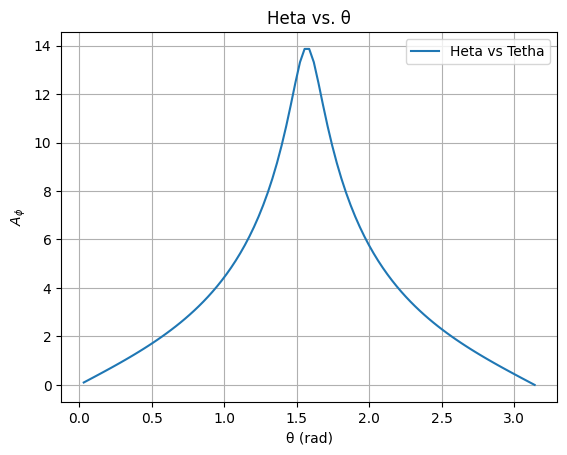

In [ ]:
# Primera Grafica
theta_values = np.linspace(0, np.pi, 100)
A_phi_theta = [A_phi(1.1, theta, a, I, mu0_4pi) for theta in theta_values]
plt.figure()
plt.plot(theta_values, A_phi_theta, label="Heta vs Tetha")
plt.xlabel("θ (rad)")
plt.ylabel("$A_\phi$")
plt.title("Heta vs. θ")
plt.legend()
plt.grid()
plt.show()

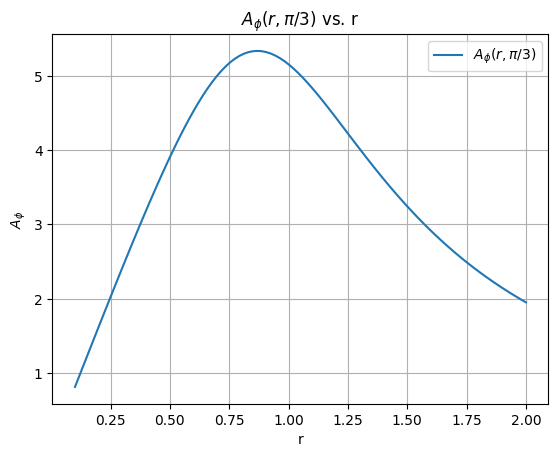

In [ ]:
#Segunda Grafica
r_values = np.linspace(0.1, 2, 100)
A_phi_r = [A_phi(r, np.pi/3, a, I, mu0_4pi) for r in r_values]
plt.figure()
plt.plot(r_values, A_phi_r, label="$A_\phi(r, \pi/3)$")
plt.xlabel("r")
plt.ylabel("$A_\phi$")
plt.title("$A_\phi(r, \pi/3)$ vs. r")
plt.legend()
plt.grid()
plt.show()